In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation
%matplotlib inline

In [2]:
rng = np.random.RandomState(0)

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# step size in the mesh
h = 0.02

y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3] = -1
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5] = -1

In [3]:
# We create an instance of SVM and fit out data. 
# We do not scale our data since we want to plot the support vector
ls30 = (label_propagation.LabelSpreading().fit(X, y_30), y_30)
ls50 = (label_propagation.LabelSpreading().fit(X, y_50), y_50)
ls100 = (label_propagation.LabelSpreading().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf').fit(X,y), y)

In [4]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [5]:
# title for the plots
titles = [
    'Label Spreading 30% data',
    'Label Spreading 50% data',
    'Label Spreading 100% data',
    'SVC with rbf kernel'
]

color_map = {-1: (1,1,1), 0:(0,0,0.9), 1:(1,0,0), 2:(.8,.6,0)}

plt.figure(figsize=(40,40))

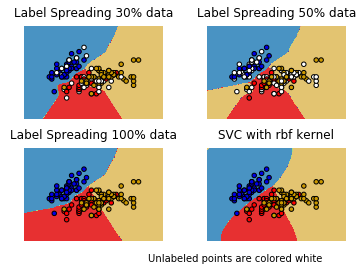

In [6]:
for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    # Plot the decisoin boundary. for that, we will assign a color to each point in mesh
    plt.subplot(2,2,i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # put result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    
    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, cmap=plt.cm.Paired)
    plt.title(titles[i])
    
plt.text(.90, 0, "Unlabeled points are colored white")
plt.show()